<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/cluster_airlines1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

In [2]:
!pip install xlrd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import xlrd

In [4]:
data = xlrd.open_workbook('/content/EastWestAirlines.xlsx')

In [6]:
data = pd.read_csv('/content/EastWestAirlines.csv')

In [7]:
data

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   East-West Airlines is trying to learn more about its customers.  Key issues are their  18 non-null     object
 1   Unnamed: 1                                                                             13 non-null     object
 2   Unnamed: 2                                                                             6 non-null      object
 3   Unnamed: 3                                                                             13 non-null     object
 4   Unnamed: 4                                                                             18 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [12]:
data = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')

In [13]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [14]:
from sklearn.preprocessing import normalize

In [15]:
air_data = data

In [17]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [18]:
air_df = air_data.drop('ID#',axis=1)

In [19]:
air_df_norm = normalize(air_df)

In [20]:
air_df_norm

array([[9.70414393e-01, 0.00000000e+00, 3.44815547e-05, ...,
        0.00000000e+00, 2.41370883e-01, 0.00000000e+00],
       [9.40208573e-01, 0.00000000e+00, 4.88572320e-05, ...,
        0.00000000e+00, 3.40437193e-01, 0.00000000e+00],
       [9.81113099e-01, 0.00000000e+00, 2.37247449e-05, ...,
        0.00000000e+00, 1.66879855e-01, 0.00000000e+00],
       ...,
       [9.44947533e-01, 0.00000000e+00, 3.85184532e-05, ...,
        0.00000000e+00, 1.80009571e-02, 1.28394844e-05],
       [9.99591676e-01, 0.00000000e+00, 1.82078303e-05, ...,
        1.82078303e-05, 2.55091703e-02, 0.00000000e+00],
       [9.07271293e-01, 0.00000000e+00, 3.00819394e-04, ...,
        0.00000000e+00, 4.20545513e-01, 0.00000000e+00]])

In [21]:
df = pd.DataFrame(air_df_norm, columns = air_df.columns)

In [22]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


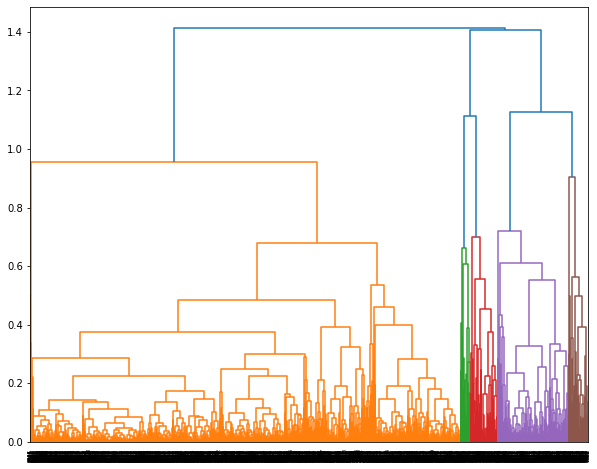

In [23]:
plt.figure(figsize=(10,8))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(df, 'complete'))

In [24]:
hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage='ward')

In [25]:
hclabel = hc.fit_predict(df)

In [29]:
hc.labels_

array([1, 2, 2, ..., 2, 1, 2])

In [26]:
hclabel = pd.Series(hclabel)

In [27]:
air_data['hclabel'] = hclabel

In [28]:
air_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hclabel
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [30]:
air_data.groupby('hclabel').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
hclabel,,,,,,,,,,,,
0,1950.567329,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
1,2222.257767,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898
2,1926.244990,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,2035.034542,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,1578.120690,6872.149425,11.522989,1.000000,1.000000,1.000000,603.034483,2.385057,71.201149,0.212644,4929.948276,0.126437
5,1712.145455,1259.872727,0.000000,1.000000,1.000000,1.000000,526.000000,2.454545,53.636364,0.200000,4702.418182,0.145455


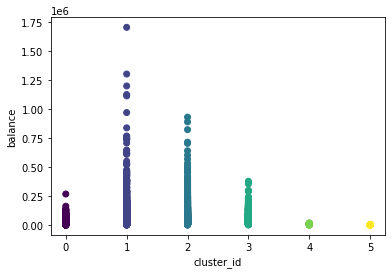

In [31]:
plt.scatter(air_data.hclabel, air_data.Balance, c = hc.labels_)
plt.xlabel('cluster_id')
plt.ylabel('balance')
plt.show()

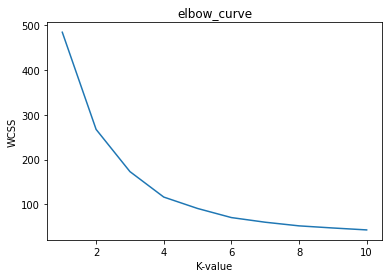

In [32]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('elbow_curve')
plt.xlabel('K-value')
plt.ylabel('WCSS')
plt.show()

In [33]:
model = KMeans(n_clusters=4,init='k-means++',random_state=34)

In [35]:
clusters = model.fit_predict(df)

In [36]:
clusters

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [37]:
air_data['y_kmeans'] = clusters

In [38]:
df0 = air_data[air_data.y_kmeans ==0]
df1 = air_data[air_data.y_kmeans ==1]
df2 = air_data[air_data.y_kmeans ==2]
df3 = air_data[air_data.y_kmeans ==3]

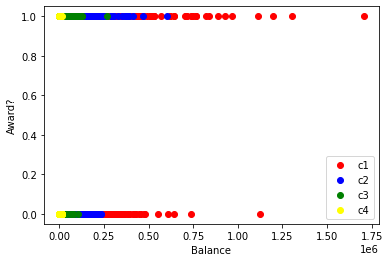

In [41]:
plt.scatter(df0['Balance'],df0['Award?'],color='red',label = 'c1')
plt.scatter(df1['Balance'],df1['Award?'],color='blue',label = 'c2')
plt.scatter(df2['Balance'],df2['Award?'],color='green',label = 'c3')
plt.scatter(df3['Balance'],df3['Award?'],color='yellow',label = 'c4')
plt.ylabel('Award?')
plt.xlabel('Balance')
plt.legend()
plt.show()

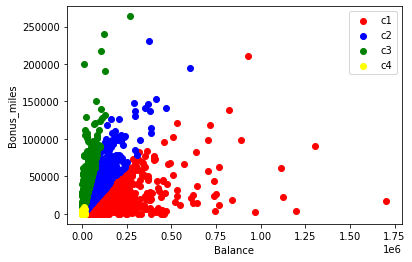

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

In [44]:
plt.scatter(df0['Balance'],df0['Bonus_miles'],color='red',label = 'c1')
plt.scatter(df1['Balance'],df1['Bonus_miles'],color='blue',label = 'c2')
plt.scatter(df2['Balance'],df2['Bonus_miles'],color='green',label = 'c3')
plt.scatter(df3['Balance'],df3['Bonus_miles'],color='yellow',label = 'c4')
plt.ylabel('Bonus_miles')
plt.xlabel('Balance')
plt.legend()
plt.show()
plt.figure(figsize=(16,10))

In [45]:
air_data.shape

(3999, 14)

In [61]:
dbscan = DBSCAN(eps=1, min_samples=12)

In [62]:
y_dbscan = dbscan.fit_predict(df)

In [63]:
y_dbscan

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
y_dbscan = pd.Series(y_dbscan)

In [65]:
air_data['DBscan'] = y_dbscan

In [66]:
air_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hclabel,y_kmeans,DBscan
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0


In [67]:
air_data['DBscan'].value_counts()

0    3999
Name: DBscan, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f52cc9b7650>],
 'caps': [<matplotlib.lines.Line2D at 0x7f52cf6d1690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f52ccb3df10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f52ccb3d450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f52cf6d1390>,
  <matplotlib.lines.Line2D at 0x7f52cf6d16d0>]}

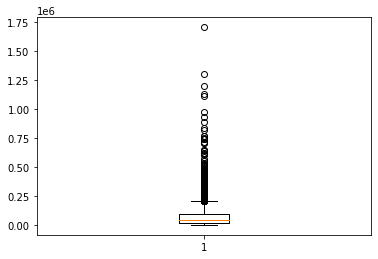

In [76]:
plt.boxplot(air_data['Balance'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f5298555b10>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x7f529bc6c990>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0x7f529bba42d0>,
  ...],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f529bba4990>,
  ...],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5298555050>,
  ...]}

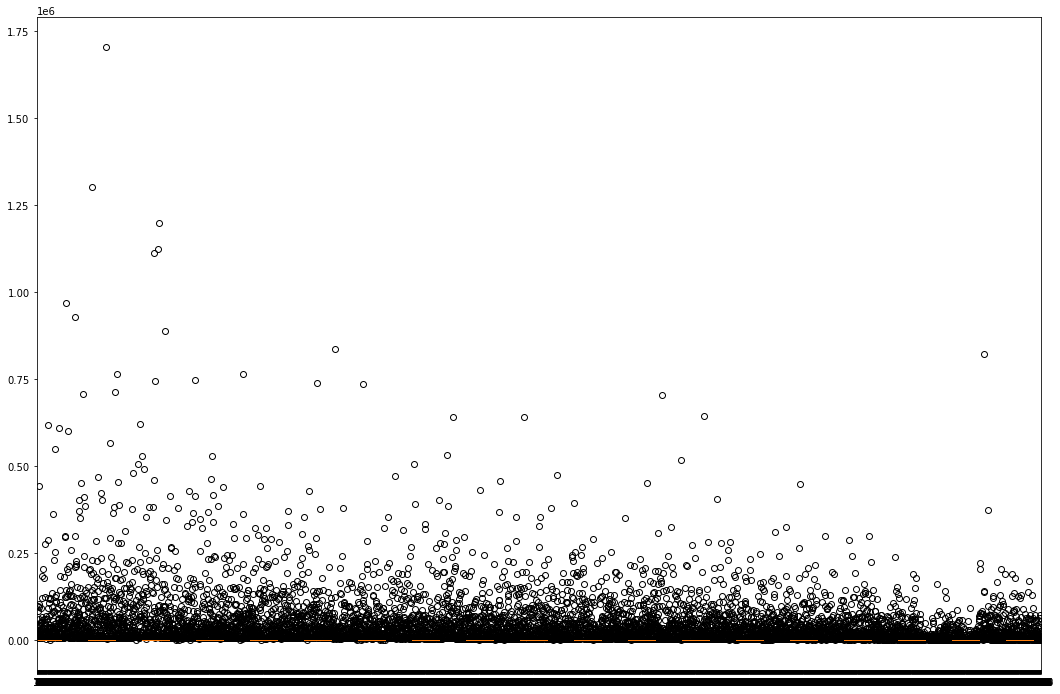

In [80]:
plt.figure(figsize=(18,12))
plt.boxplot(air_df)

we can clearly see why DBSCAN results would be only 0 or only -1. 